**PA 2: Data**

Polycystic ovary syndrome (PCOS) dataset

Link: https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing data
file_path_with_infertility="/content/drive/MyDrive/project assignments/datasets/PCOS_infertility.csv"
file_path_without_infertility="/content/drive/MyDrive/project assignments/datasets/PCOS_data_without_infertility.xlsx"

PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

In [ ]:
PCOS_inf.shape

(541, 6)

In [ ]:
PCOS_woinf.head()
PCOS_woinf.shape

(541, 45)

In [ ]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.tail() 

<ipython-input-7-0cd7eedcb9fe>:3: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5
540,541,541,1,23,82.0,165.000,30.1,13,80,20,...,1,1.0,0,120,70,9,10,19.0,18.0,6.9


In [ ]:
data.shape

(541, 44)

In [ ]:
# Identifying the data types
data.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

Two columns are numeric but they are stored as string that we need to convert them to numeric values:

II    beta-HCG(mIU/mL)

AMH(ng/mL)

In [ ]:
# Identifying the missing values
data.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [ ]:
# printing rows with missing values
data[data.isna().any(axis=1)]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
123,1,23,40.0,150.0,17.777778,15,74,18,10.8,2,...,0,1.0,1,100,70,10,13,18.0,17.0,12.5
305,0,37,56.0,152.0,24.238227,13,74,20,11.7,2,...,1,0.0,1,120,70,4,5,17.0,16.0,5.6


In [ ]:
# Dropping rows with NaN value
data = data.dropna()

# Clearing up the extra space in the column names (optional)
data.columns = [col.strip() for col in data.columns]

# Dropping the irrelevent columns
irrelevent=data.iloc[:,0:2]
data=data.drop(irrelevent,axis=1)
data

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


The columns with missing values (each contain one missing value):

Marraige Status (Yrs)     1

Fast food (Y/N)           1


In [ ]:
# Converting strings to numeric values
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')
# Checking the result
data.dtypes

PCOS (Y/N)                  int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
I   beta-HCG(mIU/mL)      float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

# **Data Analysis & Feature Engineering**

In [ ]:
# Calegorical features
columns = data.columns

categorical_columns_dict = {}
categorical_columns = []
for column in columns:
  if len(data[column].unique()) < 9:
    categorical_columns_dict[column] = len(data[column].unique())
    categorical_columns.append(column)

#print(columns)
for key, value in categorical_columns_dict.items():
  print(key, ": ", value)

PCOS (Y/N) :  2
Blood Group :  8
RR (breaths/min) :  8
Cycle(R/I) :  3
Pregnant(Y/N) :  2
No. of aborptions :  6
Weight gain(Y/N) :  2
hair growth(Y/N) :  2
Skin darkening (Y/N) :  2
Hair loss(Y/N) :  2
Pimples(Y/N) :  2
Fast food (Y/N) :  2
Reg.Exercise(Y/N) :  2
BP _Systolic (mmHg) :  6
BP _Diastolic (mmHg) :  5


From the table above and analyzing the data we can colclude the following columns are categorical:

Blood Group

Cycle(R/I)

Pregnant(Y/N)

Weight gain(Y/N)

hair growth(Y/N)

Skin darkening (Y/N)

Hair loss(Y/N) 

Pimples(Y/N)

Fast food (Y/N)

Reg.Exercise(Y/N)

In [ ]:
# Removing the incorrect ones from the categorical columns
categorical_columns.remove('RR (breaths/min)')
categorical_columns.remove('No. of aborptions')
categorical_columns.remove('BP _Systolic (mmHg)')
categorical_columns.remove('BP _Diastolic (mmHg)')
categorical_columns.remove('PCOS (Y/N)')

In [ ]:
# The rest are numerical columns
numeric_columns = list(set(columns) - set(categorical_columns))
numeric_columns

['Pulse rate(bpm)',
 'PRG(ng/mL)',
 'TSH (mIU/L)',
 'PRL(ng/mL)',
 'BMI',
 'Endometrium (mm)',
 'AMH(ng/mL)',
 'RBS(mg/dl)',
 'Hip(inch)',
 'Waist:Hip Ratio',
 'II    beta-HCG(mIU/mL)',
 'Cycle length(days)',
 'No. of aborptions',
 'I   beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'RR (breaths/min)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Height(Cm)',
 'BP _Systolic (mmHg)',
 'Weight (Kg)',
 'Marraige Status (Yrs)',
 'Hb(g/dl)',
 'Waist(inch)',
 'Follicle No. (R)',
 'Vit D3 (ng/mL)',
 'Age (yrs)',
 'PCOS (Y/N)',
 'FSH/LH',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)']

The label of the model we are going to choose would be:

PCOS (Y/N)

We have deleted the row 157 and row 459 with missing values.

We have also deleted the first two columns that is irrelevent with the future ML model we are going to build.

After all these, we couldn't identify any more issues with the data. So we will proceed with the univariate and bivariate analysis.

**Univariate analysis & bivariate analysis**

<ipython-input-17-b7ab6fe0d8ab>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


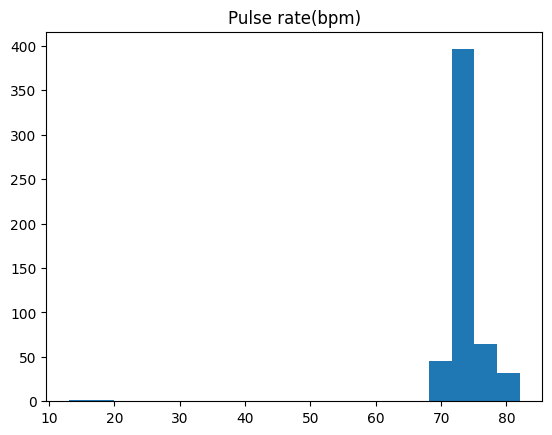

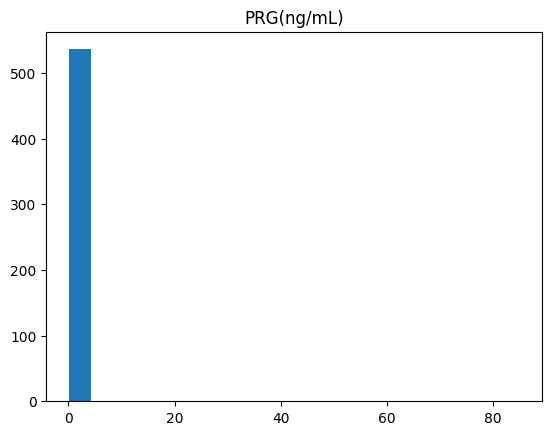

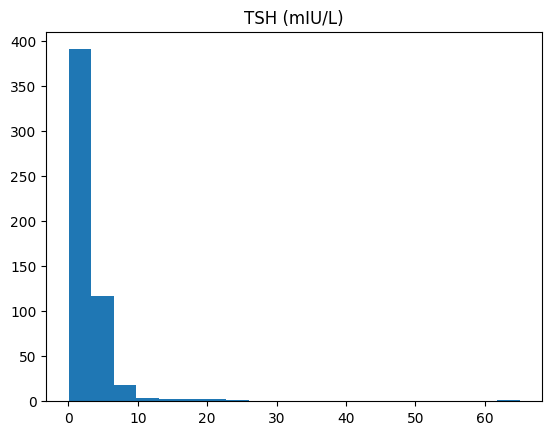

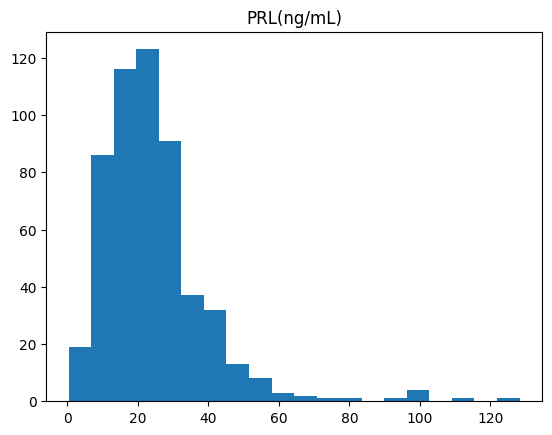

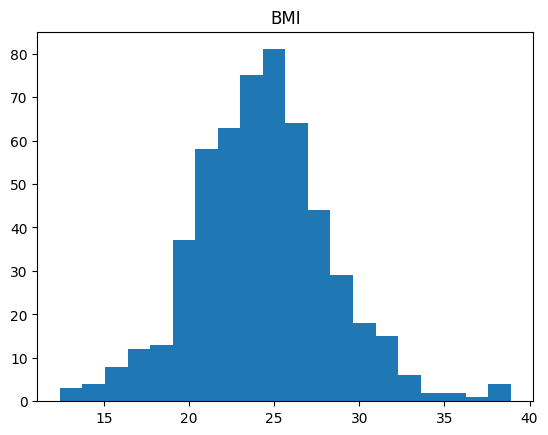

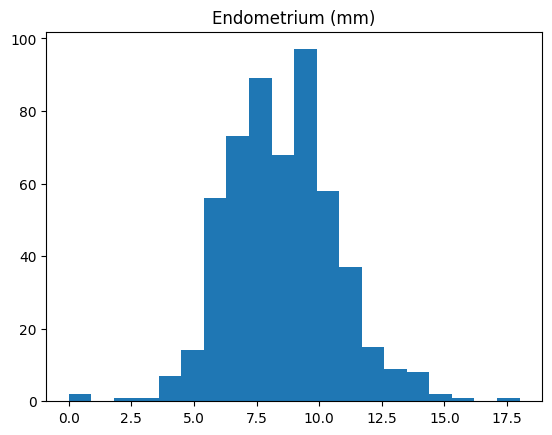

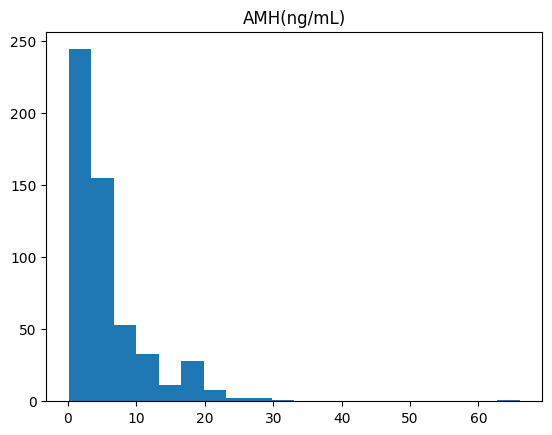

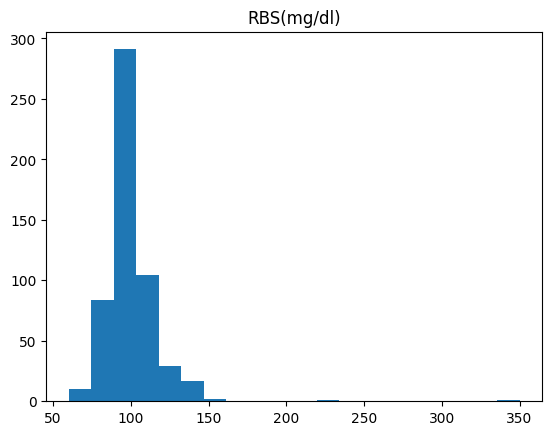

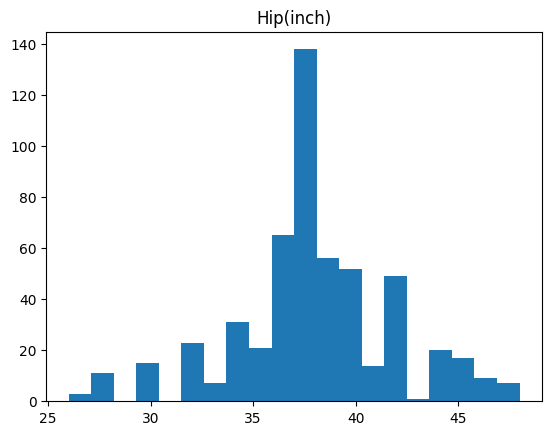

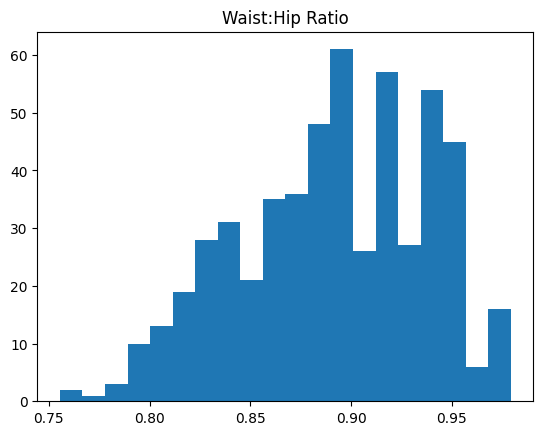

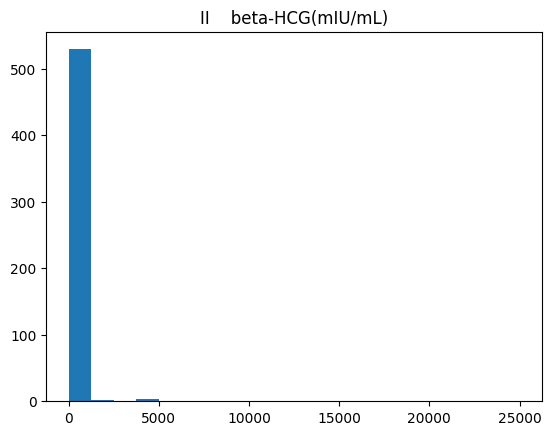

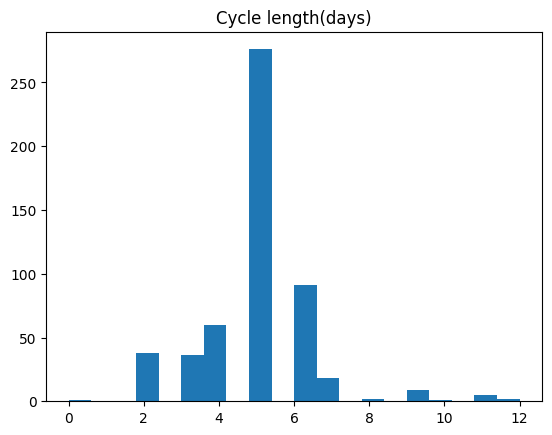

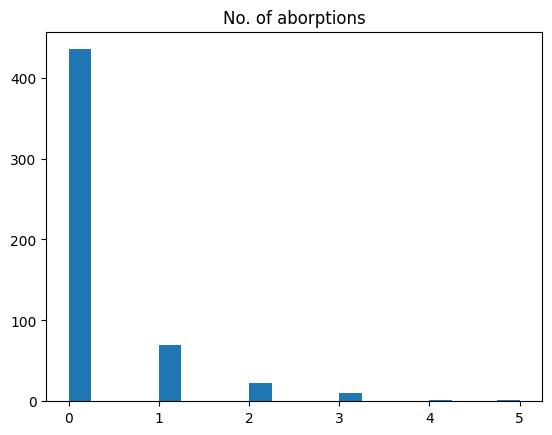

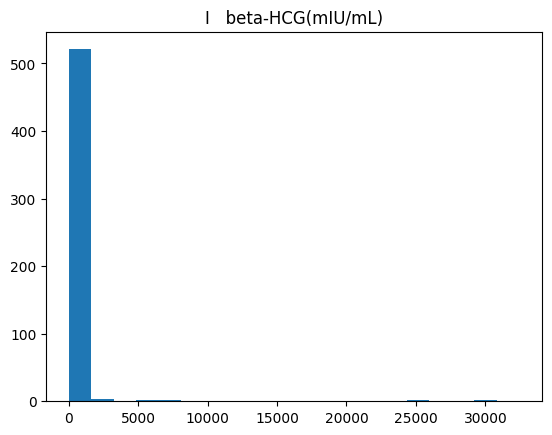

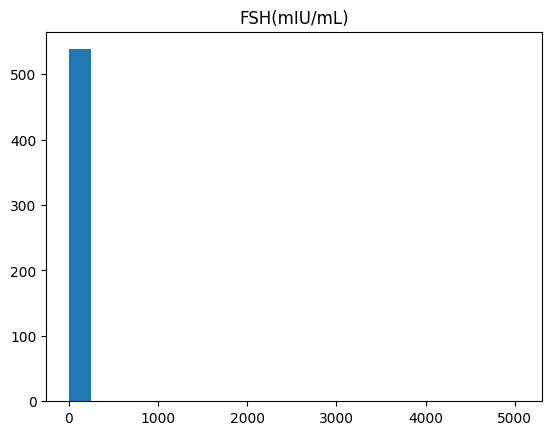

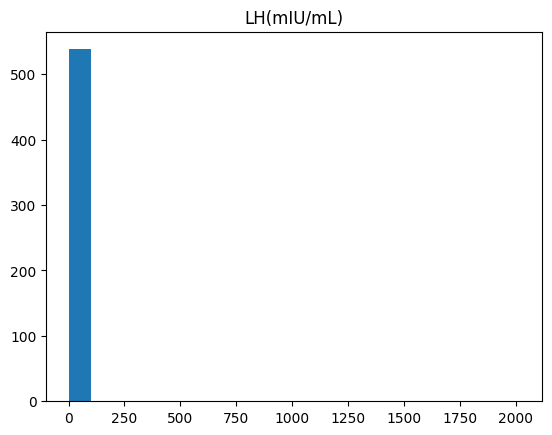

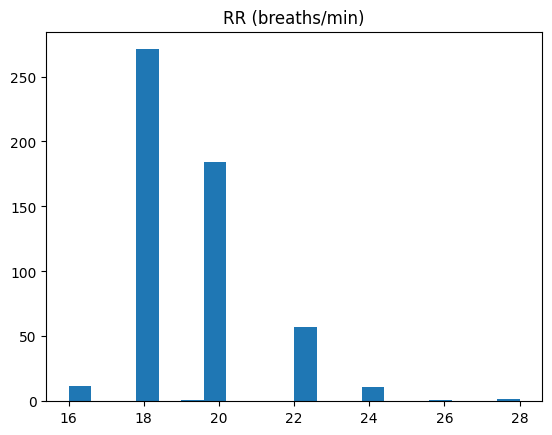

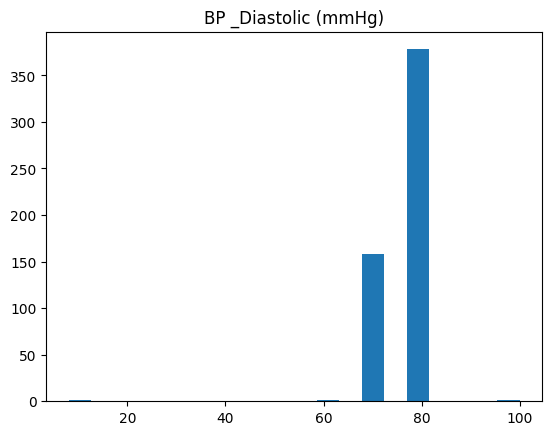

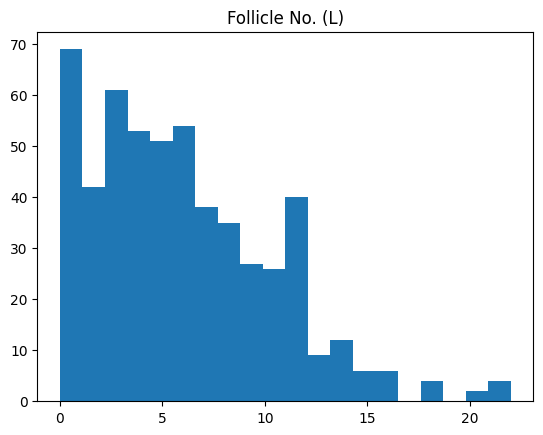

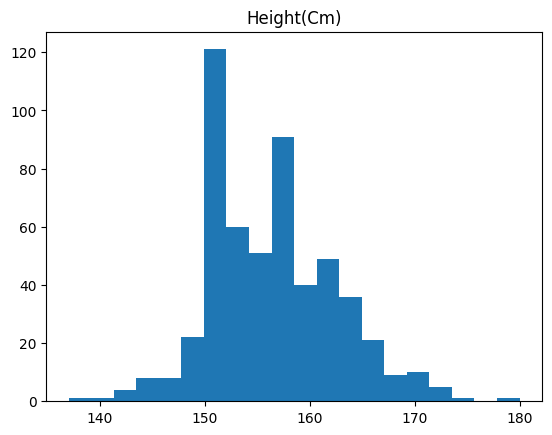

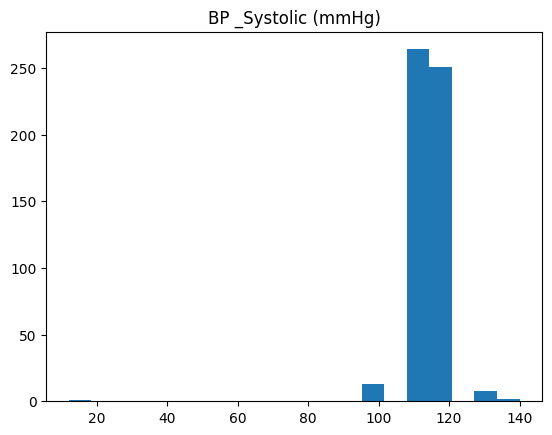

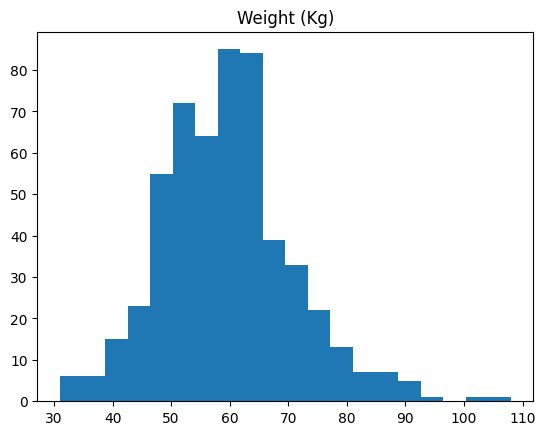

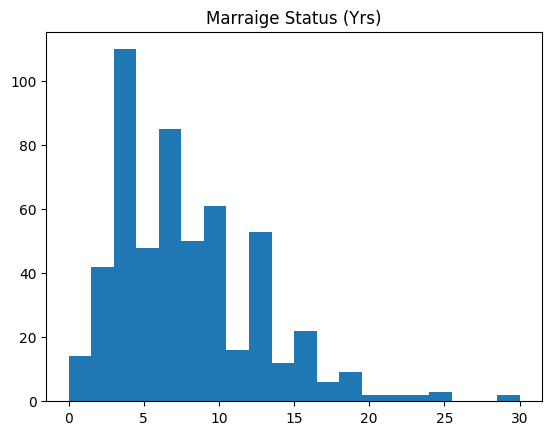

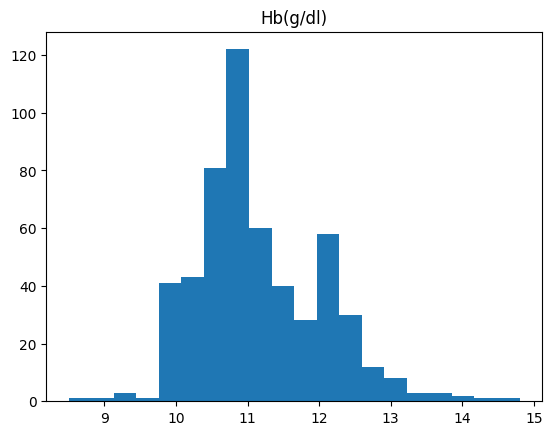

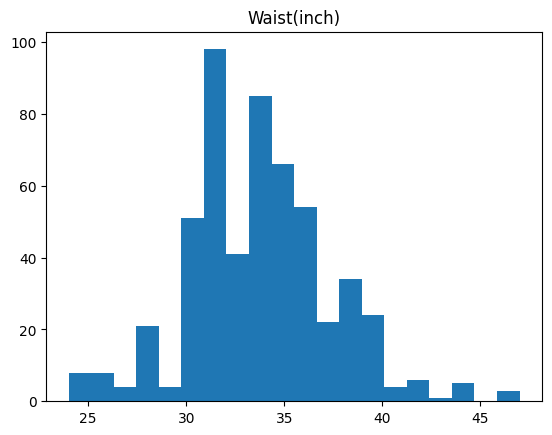

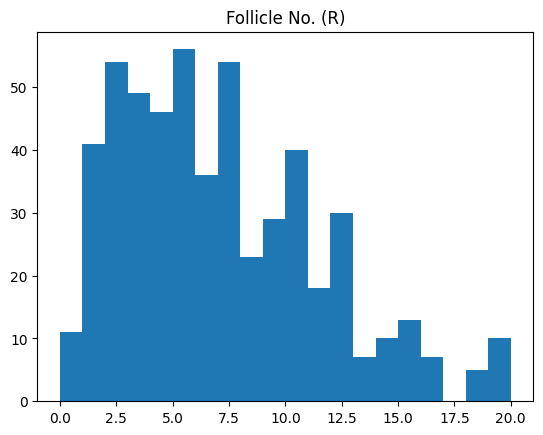

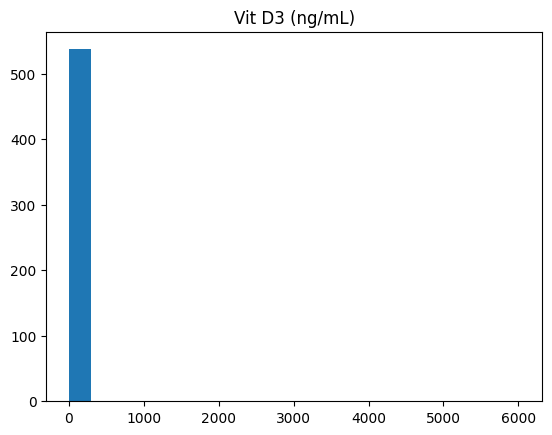

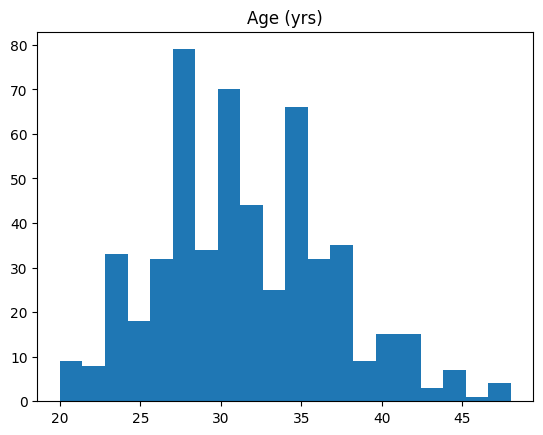

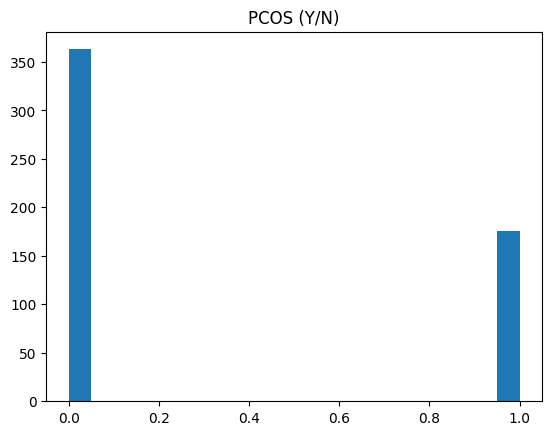

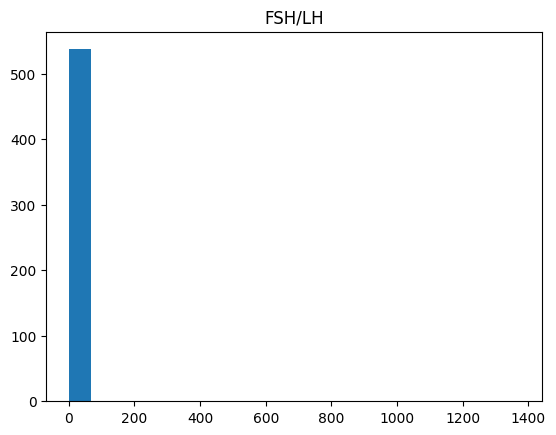

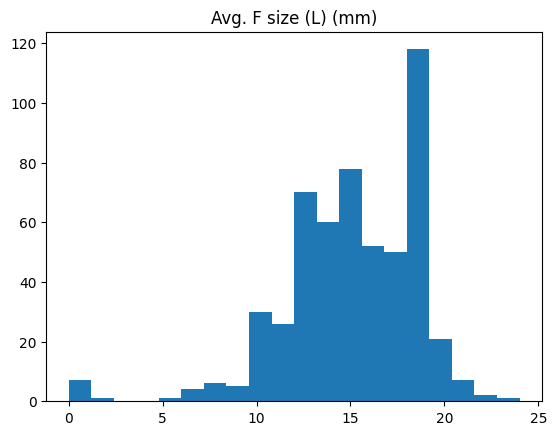

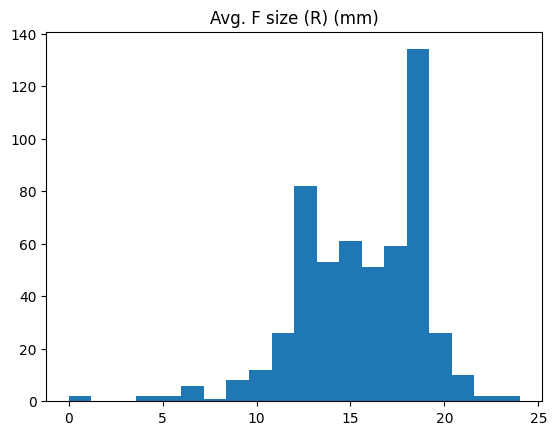

In [ ]:
import matplotlib.pyplot as plt

for col in numeric_columns:
  plt.figure()
  plt.title(col)
  plt.hist(data[col],bins=20)

The following columns seem to have a Gaussian distribution:

Endometrium

Weight

Age

Mariage Status

PRL

Cycle Length

Waist

Hip

Waist:Hip ratio

Average F Size

RBS

BMI

Height

HB

In [ ]:
for col in numeric_columns:
  plt.figure()
  plt.title(col)
  plt.boxplot(data[col])

In [ ]:
for col in categorical_columns:
  plt.figure()
  plt.title(col)
  plt.hist(data[col],bins=20)

The following columns seem to have outliers:

PRG

FSH

LH

FSH/LH

AMH

PRL

Cycle(R/I)

I   beta-HCG

II    beta-HCG

Pulse rate

TSH

Vit D3
 
RBS

BP _Systolic

BP _Diastolic.

In "Cycle (R/I)": there is an outlier value of 5, possibly a typo during the data recording. Should we drop this sample?

In "Pulse rate": one count of 13, one count of 18. Are they typos?

"beta HCG", "PRL", "TSH", "FSH" "LH" "AMH" "PRL" "Vit D3" "PRG" and "RBS" columns have a lot of outliers which rises some concerns with respect to the correctness of lab measurements.

BP_systolic: a value of 12. Maybe a typo during the data recording. Should it be 120 instead?

BP_Diastolic: a value of 8. Maybe a typo during the data recording. Should it be 80 instead?


In [ ]:
import seaborn as sns

# Examaning a correlation matrix of all the features 
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

Features with binary values:

Pregnant(Y/N)

Weight gain(Y/N)

hair growth(Y/N)

Skin darkening (Y/N)

Hair loss(Y/N)

Pimples(Y/N)

Fast food (Y/N)

Reg.Exercise(Y/N)

In [ ]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)


In [ ]:
import numpy as np

#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Since the ranges of features vary a lot between our features we will need to perform scaling before building the ML model.

Here are some potential datasets that could be added to the PCOS dataset to improve its usefulness and scope:

Diet and lifestyle habits: Information about the patient's diet and exercise habits can provide insight into the potential causes of PCOS and help guide treatment recommendations.

Genomic data: Genomic data can provide insight into the genetic basis of PCOS and help identify potential risk factors and treatment targets.

No change in problem definition is needed.